In [2]:
!date

Втр Дек 20 15:07:41 MSK 2016


In [1]:
!pwd

/home/sphere/Analysis/400CheckTrigger/results/all_events


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

In [3]:
datum = pd.read_csv('log_events.txt', index_col=0, sep=' ')
len(datum)

454

In [4]:
datum[:3]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
10675,1,1,238,238,1,3
10677,1,1,235,236,1,3
10685,1,1,205,238,1,3


### Распределение по TL3 и TG5

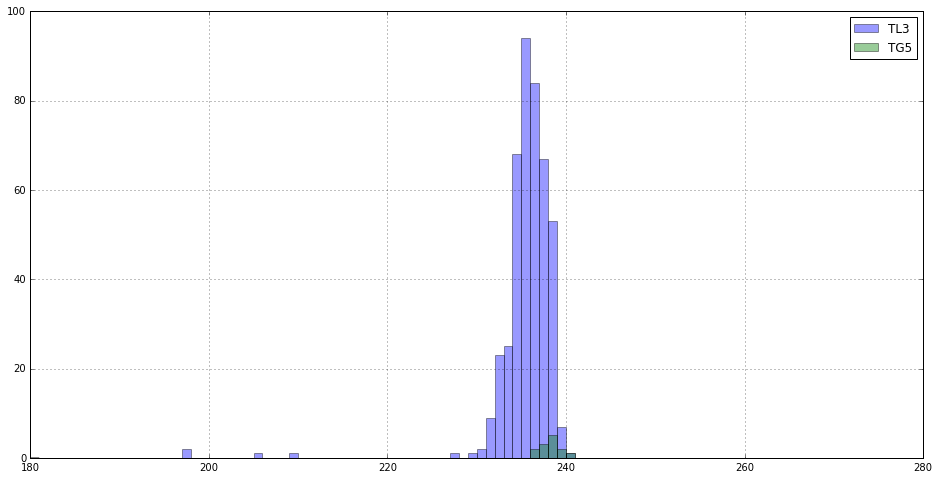

In [30]:
plt.figure(figsize=(16,8))
plt.hist(datum['TL3'][datum['TT']==3], range=[180, 280], bins=100, alpha=0.4, label=r"TL3")
plt.hist(datum['TG5'][datum['TT']==5], range=[180, 280], bins=100, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
#plt.semilogy()
plt.grid()

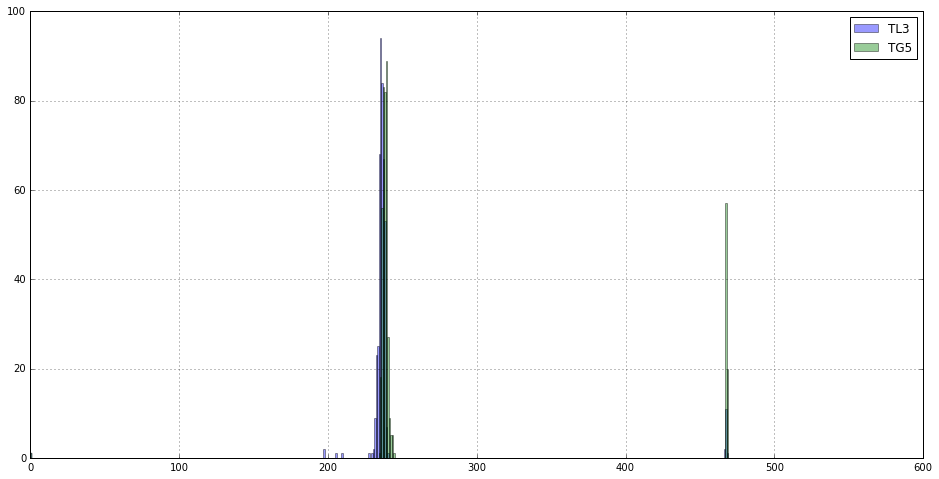

In [31]:
plt.figure(figsize=(16,8))
plt.hist(datum['TL3'], range=[0, 512], bins=512, alpha=0.4, label=r"TL3")
plt.hist(datum['TG5'], range=[0, 512], bins=512, alpha=0.4, label=r"TG5")
plt.legend(loc=1)
#plt.semilogy()
plt.grid()

Во всех событиях есть триггер L3 или G5

In [18]:
datum['TG5'][datum['TT']==5].value_counts()

238    5
237    3
239    2
236    2
240    1
Name: TG5, dtype: int64

In [16]:
datum['TL3'][datum['TT']==3].value_counts()

235    94
236    84
234    68
237    67
238    53
233    25
232    23
231     9
239     7
197     2
230     2
209     1
205     1
467     1
227     1
229     1
240     1
0       1
Name: TL3, dtype: int64

В одном событии 11544 триггер сработал на нулевом временном бине:

In [17]:
datum[datum['TL3']==0]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,
11544,1,1,0,0,1,3


In [19]:
datum['FlagL3'].value_counts()

1    454
Name: FlagL3, dtype: int64

In [20]:
datum[:][datum['FlagL3']==0]

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
Event,,,,,,


In [21]:
datum['FlagG5'].value_counts()

1    454
Name: FlagG5, dtype: int64

In [22]:
datum['TriggerFlag'].value_counts()

1    454
Name: TriggerFlag, dtype: int64

In [23]:
datum['TT'].value_counts()

3    441
5     13
Name: TT, dtype: int64

In [25]:
print('lenTL3 = ',len(datum['TL3'][datum['TT']==3]))

lenTL3 =  441


In [26]:
print('lenTG5 = ',len(datum['TG5'][datum['TT']==5]))
#datum['TG5'][datum['TT']==5].value_counts()

lenTG5 =  13


In [27]:
#корреляции
datum.corr()

,FlagL3,FlagG5,TL3,TG5,TriggerFlag,TT
FlagL3,NaN,NaN,NaN,NaN,NaN,NaN
FlagG5,NaN,NaN,NaN,NaN,NaN,NaN
TL3,NaN,NaN,1.000000,-0.004560,NaN,0.924649
TG5,NaN,NaN,-0.004560,1.000000,NaN,-0.075985
TriggerFlag,NaN,NaN,NaN,NaN,NaN,NaN
TT,NaN,NaN,0.924649,-0.075985,NaN,1.000000


In [32]:
print('TL3 < 200:',len(datum['TL3'][datum['TL3']<200].value_counts()))
print('TG5 < 200:',len(datum['TG5'][datum['TG5']<200].value_counts()))

TL3 < 200: 2
TG5 < 200: 1
